# Checking Rank Estimates

In [29]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt

Let's make two particle collections: `sources` and `targets`

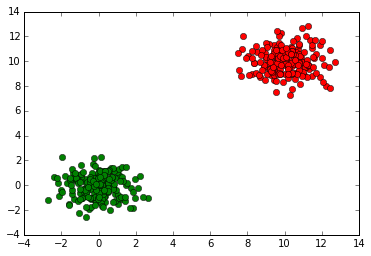

In [8]:
sources = np.random.randn(2, 200)
targets = np.random.randn(2, 200) + 10

pt.plot(sources[0], sources[1], "go")
pt.plot(targets[0], targets[1], "ro")

What's our convergence ratio $\rho$:
$$
\rho=\frac{d(c,\text{furthest target})}{d(c,\text{closest source})}?
$$

Well, what should $c$ be, really? (Technically, we can use any $c$, so we're free to choose whichever we think is best.)

In [21]:
c = np.sum(targets, axis=1) / targets.shape[1]

c

array([ 10.05952737,  10.01047655])

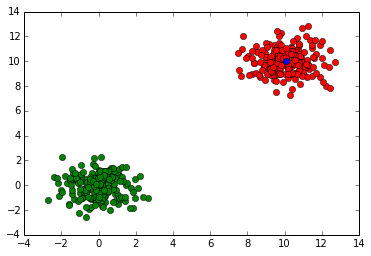

In [22]:
pt.plot(sources[0], sources[1], "go")
pt.plot(targets[0], targets[1], "ro")
pt.plot(c[0], c[1], "bo")

## Assemble the interaction matrix

In [24]:
all_distvecs = sources.reshape(2, 1, -1) - targets.reshape(2, -1, 1)
dists = np.sqrt(np.sum(all_distvecs**2, axis=0))
interaction_mat = np.log(dists)

## Estimate the rank depending on precision $\varepsilon$

First, obtain an idea of what $\rho$ is:

In [28]:
dist_tgt_to_c = np.sqrt(np.sum((c.reshape(2, 1) - targets)**2, axis=0))

dist_src_to_c = np.sqrt(np.sum((c.reshape(2, 1) - sources)**2, axis=0))



rho = np.max(dist_tgt_to_c) / np.min(dist_src_to_c)

rho

0.26574750307862688

Then plot the numerical rank depending on epsilon:

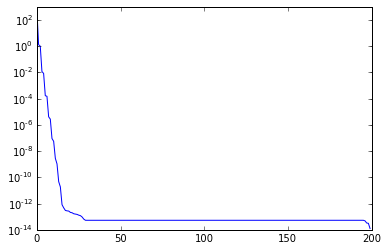

In [33]:
_, sigma, V = la.svd(interaction_mat)
pt.semilogy(sigma)

In [40]:
eps_values = 10**(-np.linspace(1, 12))

For the given precisions $\varepsilon$, find the associated numerical rank:

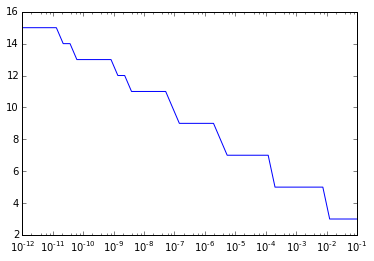

In [42]:
def numrank(eps):

    return np.sum(sigma > eps)



ranks = [numrank(e) for e in eps_values]



pt.semilogx(eps_values, ranks)

Now compare with our estimate:

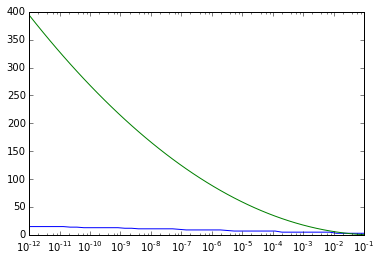

In [38]:
pt.semilogx(eps_values, ranks)
pt.semilogx(eps_values, (np.log(eps_values)/np.log(rho)-1)**2)

* We estimated that the rank would grow *quadratically*.
* Comments on how good our estimate is?